# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [5]:

# Load the dataset
df = pd.read_csv('colorectal_cancer_prediction.csv')

# Display basic information about the dataset
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

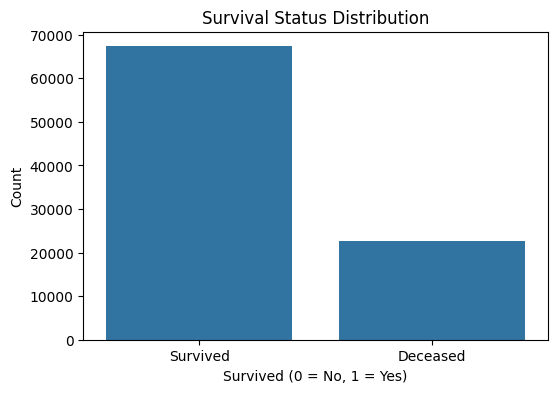

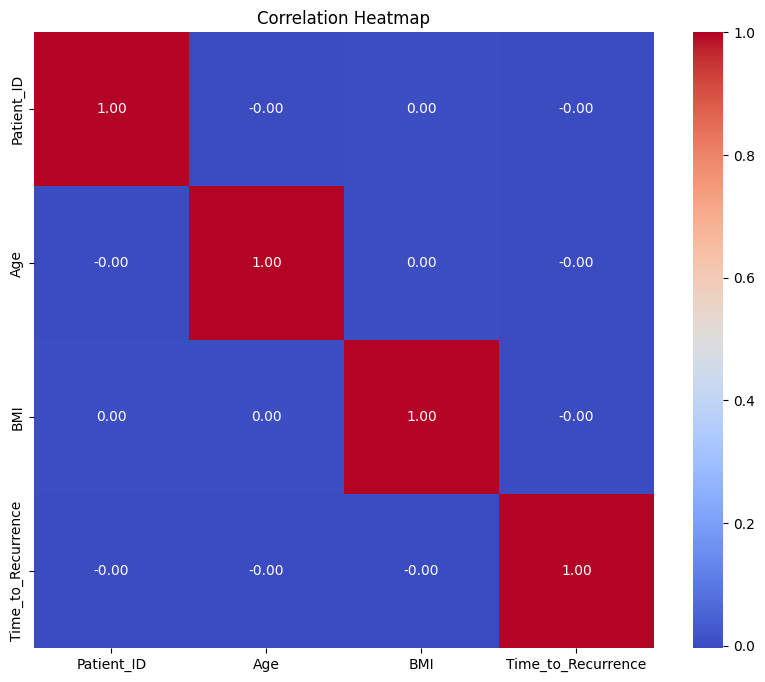

In [6]:

# Check for missing values
df.isnull().sum

# Visualize survival status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survival_Status', data=df)
plt.title('Survival Status Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (numerical features only)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [9]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns (e.g., Patient ID if present)
columns_to_drop = ['PatientID', 'PassengerId']  # adjust as needed
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target variable
  # Adjust target column name as needed
target_column = 'Survival_Status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (71956, 29)
Test set shape: (17989, 29)


## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [10]:

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
# Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7486797487353383
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4521
           1       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.37      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre